In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA

In [4]:
# Load the data
data = pd.read_csv('../resources/data_sdss.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,class,redshift,plate,mjd,fiberid
0,1237676302409728169,70.897791,-7.046481,20.26207,18.98241,18.40066,18.12477,18.04322,7178,301,...,25.52884,43.624580,56.245480,60.624390,3312454501507557376,STAR,0.000824,2942,54521,207
1,1237676302409793775,70.982693,-6.875443,20.83626,19.27628,18.46186,18.11941,17.91683,7178,301,...,19.47510,41.233770,56.523850,68.111130,3312457800042440704,STAR,0.000116,2942,54521,219
2,1237676302409859250,71.122745,-6.935282,20.31286,19.05241,18.86574,18.76263,18.74784,7178,301,...,23.93480,28.424820,31.255950,31.668570,3312452852240115712,STAR,0.000454,2942,54521,201
3,1237676302409859327,71.046302,-6.894465,20.88652,19.97834,19.62850,19.37672,19.33097,7178,301,...,10.20069,14.078840,17.752780,18.489120,3312458074920347648,STAR,0.000016,2942,54521,220
4,1237676302409859452,71.107683,-7.027117,20.08399,19.96288,20.30138,20.43546,20.52033,7178,301,...,10.34699,7.574255,6.691143,6.104117,3312455326141278208,STAR,-0.000112,2942,54521,210


In [3]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,...,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,157.041133,21.733104,21.836999,20.346590,19.253018,18.470464,18.260552,4567.960388,301.0,...,12.471062,46.863285,93.266290,131.494584,1.643316e+02,5.349399e+18,0.308527,4751.119234,55339.680578,416.807578
std,8.317876e+12,101.681940,19.596665,56.737171,42.566563,37.536372,53.038040,37.522237,1936.657424,0.0,...,214.226956,384.449280,854.509133,1137.953214,1.926129e+03,3.296621e+18,0.301834,2927.968059,1853.320868,270.307813
min,1.237650e+18,0.000464,-11.241591,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,994.000000,301.0,...,-76.284930,-58.677440,-90.033160,-224.520000,-5.562592e+02,3.208944e+17,-0.011219,285.000000,51609.000000,1.000000
25%,1.237660e+18,49.481773,3.391014,20.201615,18.560318,17.694418,17.285407,17.015497,3367.000000,301.0,...,0.201655,1.219842,4.317705,10.123227,1.538636e+01,2.284605e+18,0.000203,2029.000000,53735.000000,189.000000
50%,1.237664e+18,162.432338,22.664959,22.450830,21.040390,19.697010,18.996600,18.608295,4335.000000,301.0,...,1.027429,3.833166,13.216280,25.192825,3.601407e+01,5.201674e+18,0.226605,4620.000000,55704.000000,385.000000
75%,1.237669e+18,211.180766,34.459235,23.908010,22.278320,20.910872,19.986250,19.529592,5362.000000,301.0,...,8.301436,37.655223,83.602630,121.837325,1.562310e+02,7.686593e+18,0.544987,6827.000000,56565.000000,611.000000
max,1.237681e+18,359.998704,84.221075,31.475460,32.149970,31.990100,32.101780,30.017040,8157.000000,301.0,...,105492.900000,96845.410000,215273.000000,299233.900000,1.222679e+06,1.317780e+19,2.002617,11704.000000,58543.000000,1000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        500000 non-null  int64  
 1   ra           500000 non-null  float64
 2   dec          500000 non-null  float64
 3   u            500000 non-null  float64
 4   g            500000 non-null  float64
 5   r            500000 non-null  float64
 6   i            500000 non-null  float64
 7   z            500000 non-null  float64
 8   run          500000 non-null  int64  
 9   rerun        500000 non-null  int64  
 10  camcol       500000 non-null  int64  
 11  field        500000 non-null  int64  
 12  modelFlux_u  500000 non-null  float64
 13  modelFlux_g  500000 non-null  float64
 14  modelFlux_r  500000 non-null  float64
 15  modelFlux_i  500000 non-null  float64
 16  modelFlux_z  500000 non-null  float64
 17  specobjid    500000 non-null  uint64 
 18  class        500000 non-

In [5]:
# keep only ra, dec, u, g, r, u, z, class and redshift columns
data_model = data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']]
data_model.head()

,ra,dec,u,g,r,i,z,class,redshift
0,70.897791,-7.046481,20.26207,18.98241,18.40066,18.12477,18.04322,STAR,0.000824
1,70.982693,-6.875443,20.83626,19.27628,18.46186,18.11941,17.91683,STAR,0.000116
2,71.122745,-6.935282,20.31286,19.05241,18.86574,18.76263,18.74784,STAR,0.000454
3,71.046302,-6.894465,20.88652,19.97834,19.62850,19.37672,19.33097,STAR,0.000016
4,71.107683,-7.027117,20.08399,19.96288,20.30138,20.43546,20.52033,STAR,-0.000112


In [6]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ra        500000 non-null  float64
 1   dec       500000 non-null  float64
 2   u         500000 non-null  float64
 3   g         500000 non-null  float64
 4   r         500000 non-null  float64
 5   i         500000 non-null  float64
 6   z         500000 non-null  float64
 7   class     500000 non-null  object 
 8   redshift  500000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 34.3+ MB


In [7]:
data_model.describe()

,ra,dec,u,g,r,i,z,redshift
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,157.041133,21.733104,21.836999,20.346590,19.253018,18.470464,18.260552,0.308527
std,101.681940,19.596665,56.737171,42.566563,37.536372,53.038040,37.522237,0.301834
min,0.000464,-11.241591,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.011219
25%,49.481773,3.391014,20.201615,18.560318,17.694418,17.285407,17.015497,0.000203
50%,162.432338,22.664959,22.450830,21.040390,19.697010,18.996600,18.608295,0.226605
75%,211.180766,34.459235,23.908010,22.278320,20.910872,19.986250,19.529592,0.544987
max,359.998704,84.221075,31.475460,32.149970,31.990100,32.101780,30.017040,2.002617


# Data Cleaning

In [6]:
data_model['class'] = data_model['class'].map({'GALAXY':0, 'STAR':1})

clf = LocalOutlierFactor()
clf.fit_predict(data_model)
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#filter for dropping                                           
filter2 = outlier_score["score"] < -1.5
outlier_index = outlier_score[filter2].index.tolist()
data_model = data_model.drop(outlier_index, inplace=False)
data_model['class'] = data_model['class'].map({0:'GALAXY', 1:'STAR'})

/tmp/ipykernel_78957/1377014104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['class'] = data_model['class'].map({'GALAXY':0, 'STAR':1})


## Feature Engineering

In [7]:
data_model['color_u_g'] = data_model['u'] - data_model['g']
data_model['color_g_r'] = data_model['g'] - data_model['r']
data_model['color_r_i'] = data_model['r'] - data_model['i']
data_model['color_i_z'] = data_model['i'] - data_model['z']

In [10]:
data_model.describe()

,ra,dec,u,g,r,i,z,redshift,color_u_g,color_g_r,color_r_i,color_i_z
count,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000,492153.000000
mean,156.884300,21.752059,22.156484,20.520144,19.384453,18.745129,18.392884,0.310627,1.636341,1.135691,0.639324,0.352245
std,101.687495,19.587729,2.363537,2.194855,1.938050,1.757989,1.724364,0.300718,1.124827,0.644819,0.420968,0.326910
min,0.000464,-11.241591,12.055210,10.487280,9.432361,8.809973,9.701558,-0.011219,-4.402800,-2.799390,-3.322150,-3.979580
25%,49.159440,3.437514,20.202210,18.558580,17.693200,17.284070,17.014670,0.000238,0.972070,0.607940,0.339070,0.188330
50%,162.372542,22.714609,22.446720,21.039360,19.689000,18.991330,18.606210,0.235375,1.532300,1.124270,0.580780,0.357560
75%,211.034336,34.462908,23.893790,22.271070,20.898850,19.976680,19.519890,0.546242,2.171510,1.641840,0.950410,0.492350
max,359.998704,84.221075,28.405650,27.467450,25.346950,24.726670,24.333020,2.002617,7.594800,6.032340,4.487740,4.655870


# Data Visualization

In [11]:
sns.set_context("paper", rc={"font.size":10,
                             "axes.titlesize":15,
                             "axes.labelsize":12,
                             "xtick.labelsize":10,
                             "ytick.labelsize":10,
                             "legend.fontsize":15})

palette = {'GALAXY':'#4daf4a',
           'STAR':'#ff7f00'}

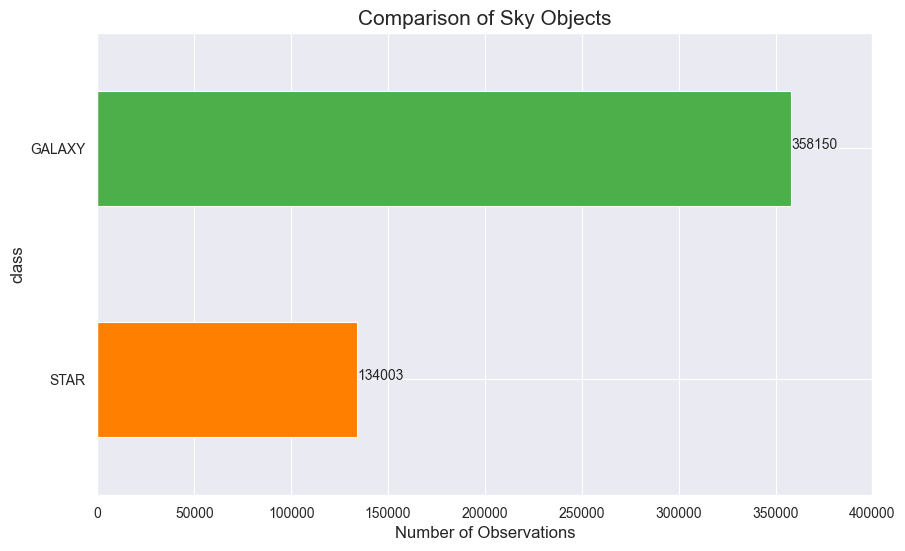

In [12]:
labels = [data_model['class'].value_counts().iloc[0],
          data_model['class'].value_counts().iloc[1]]

plt.figure(figsize=(10, 6))
data_model['class'].value_counts().plot(kind='barh', title='Comparison of Sky Objects',
                                        color=['#4daf4a', '#ff7f00', '#377eb8']).invert_yaxis()
plt.xlabel('Number of Observations')
plt.xlim(0, 400000)

for index, value in enumerate(labels):
    plt.text(value, index, str(value))

plt.show()

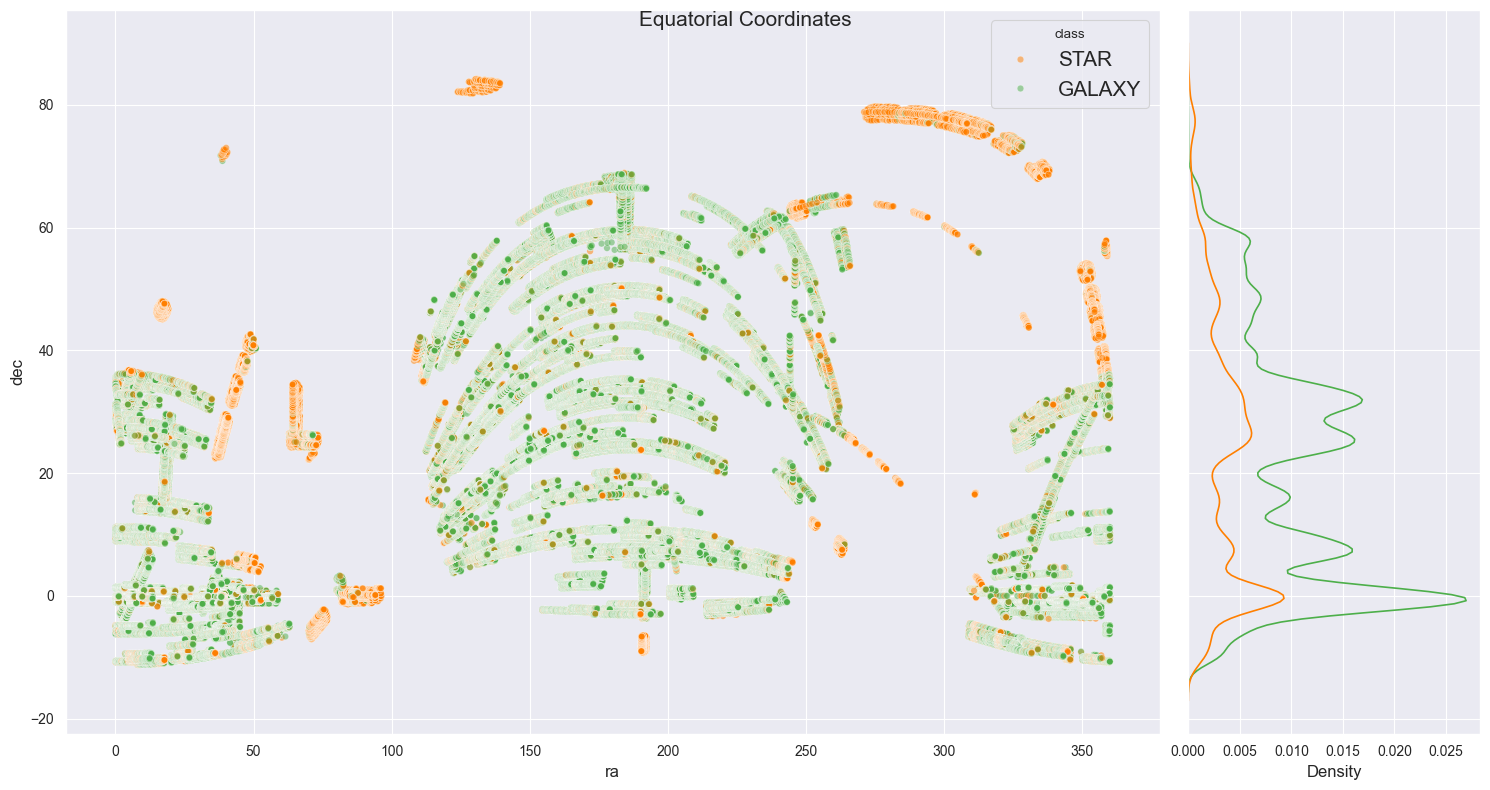

In [13]:
f, axs = plt.subplots(1,2,
                      figsize=(15,8),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,0.8]))
sns.scatterplot(x = 'ra',y = 'dec', hue = 'class', data = data_model, ax = axs[0], palette = palette, alpha = 0.5)
sns.kdeplot(y = 'dec', hue = 'class', data = data_model, ax = axs[1], palette = palette, legend = False)
f.tight_layout()

plt.suptitle('Equatorial Coordinates', fontsize = 15);

In [14]:
def get_hists(feature_name):
    if feature_name == 'redshift':
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5), sharex = True)
    
    ax = sns.histplot(data_model[data_model['class']=='GALAXY'][feature_name], bins = 30, ax = axes[0], 
                      color = '#4daf4a', kde = False)
    ax.set_title('Galaxy')
    ax = sns.histplot(data_model[data_model['class']=='STAR'][feature_name], bins = 30, ax = axes[1], 
                      color = '#ff7f00', kde = False)
    ax.set_title('Star')
    fig.suptitle(feature_name.upper(), fontsize = 15)
    fig.tight_layout(pad = 0.5)

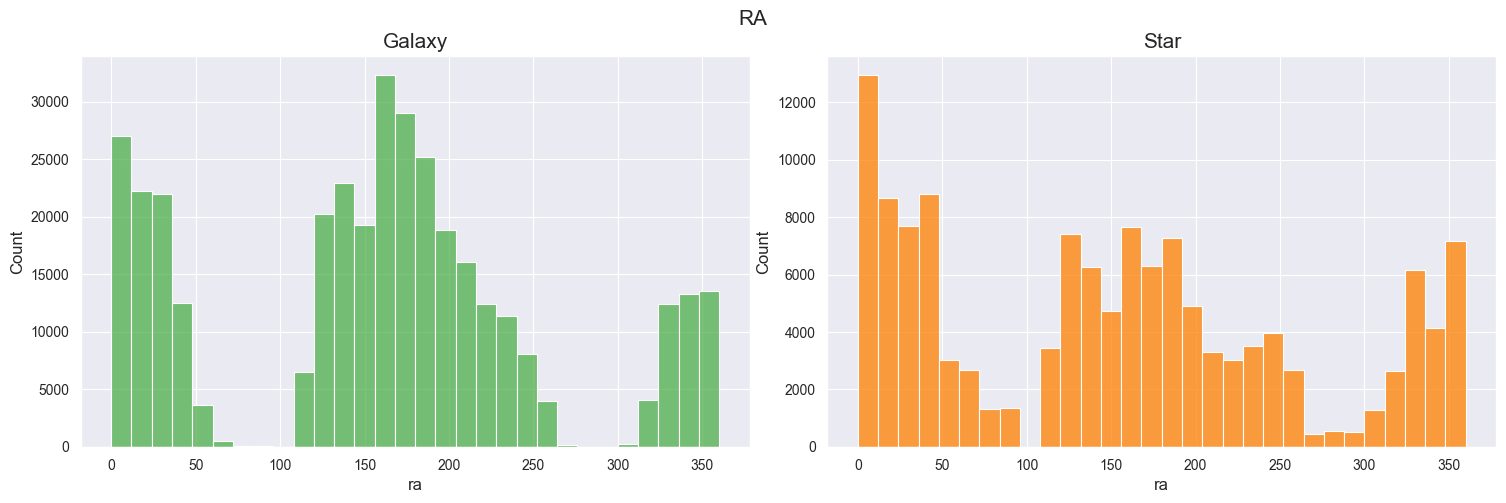

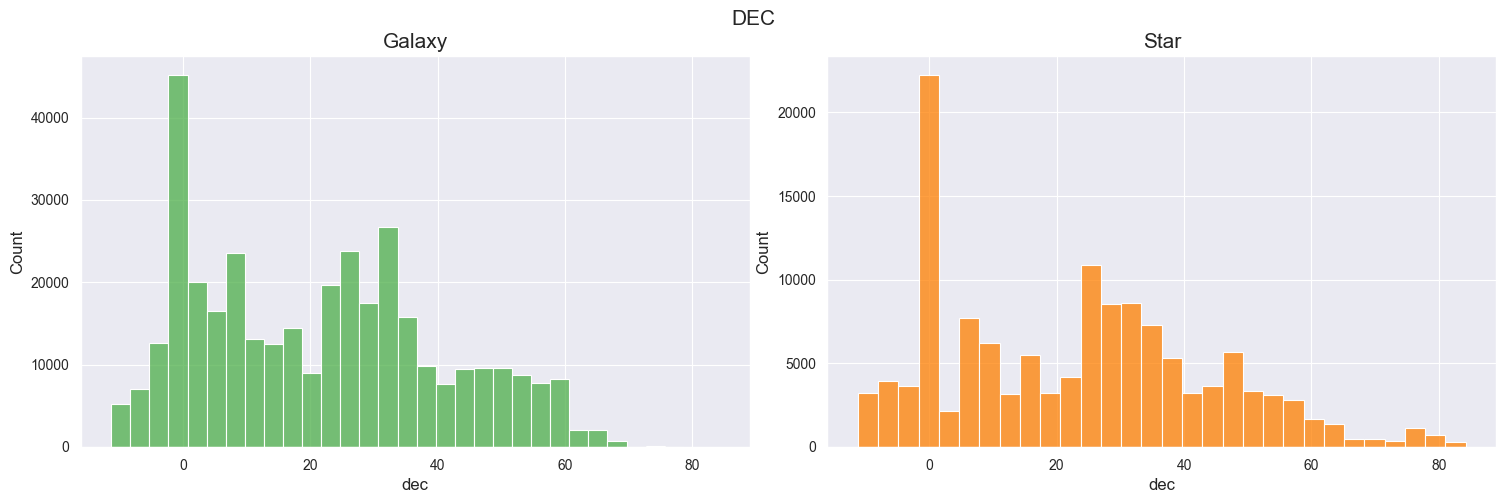

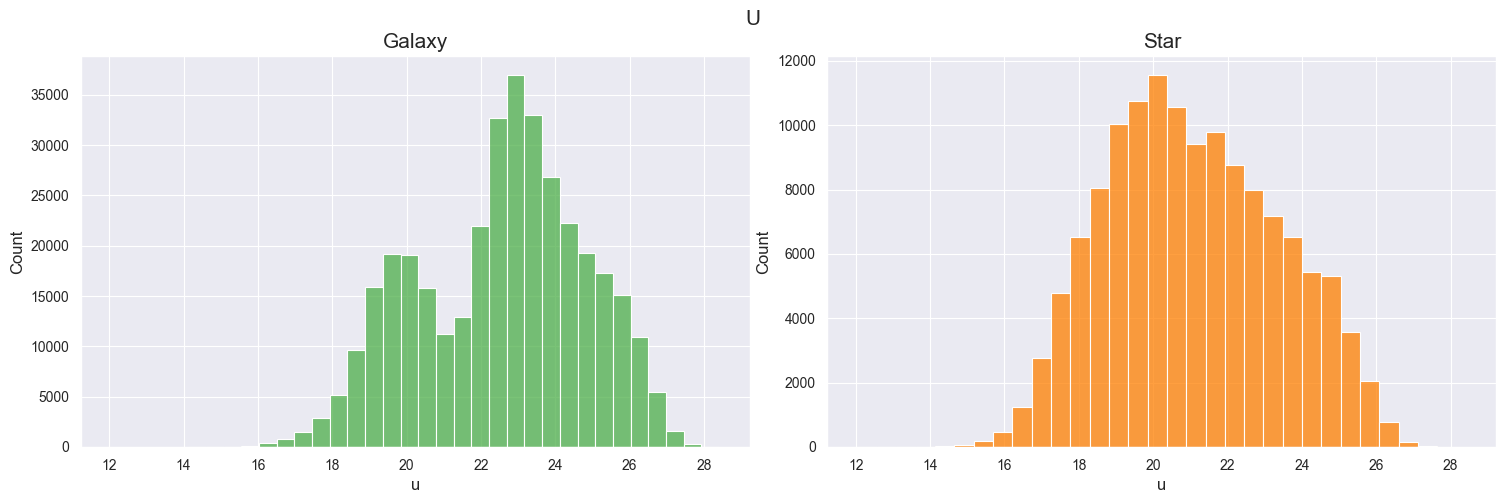

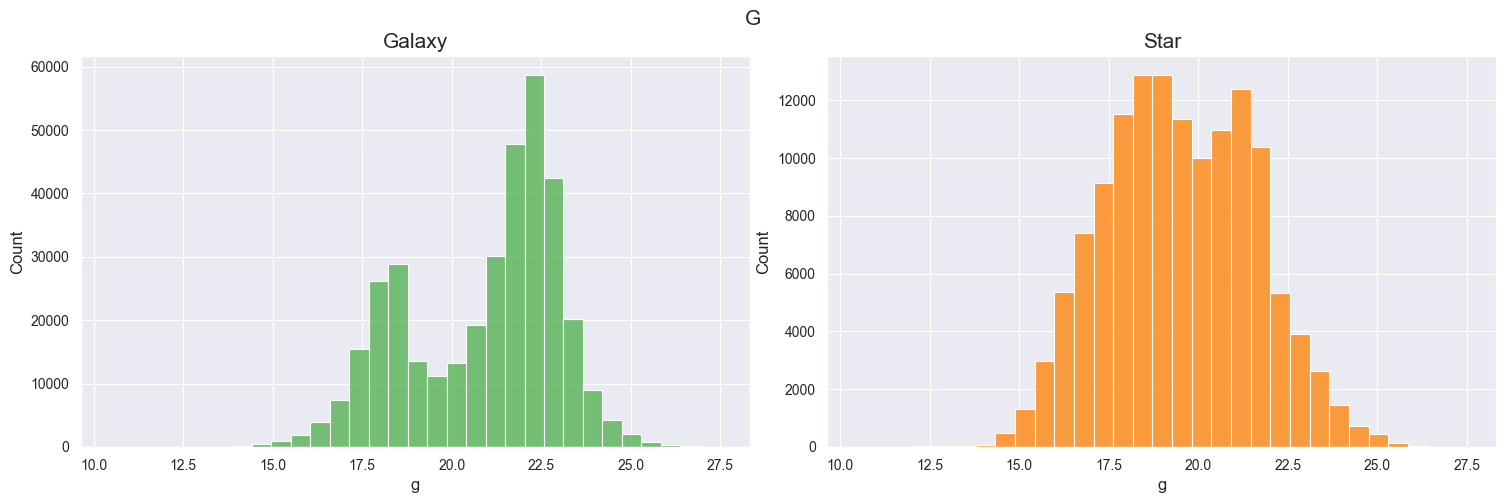

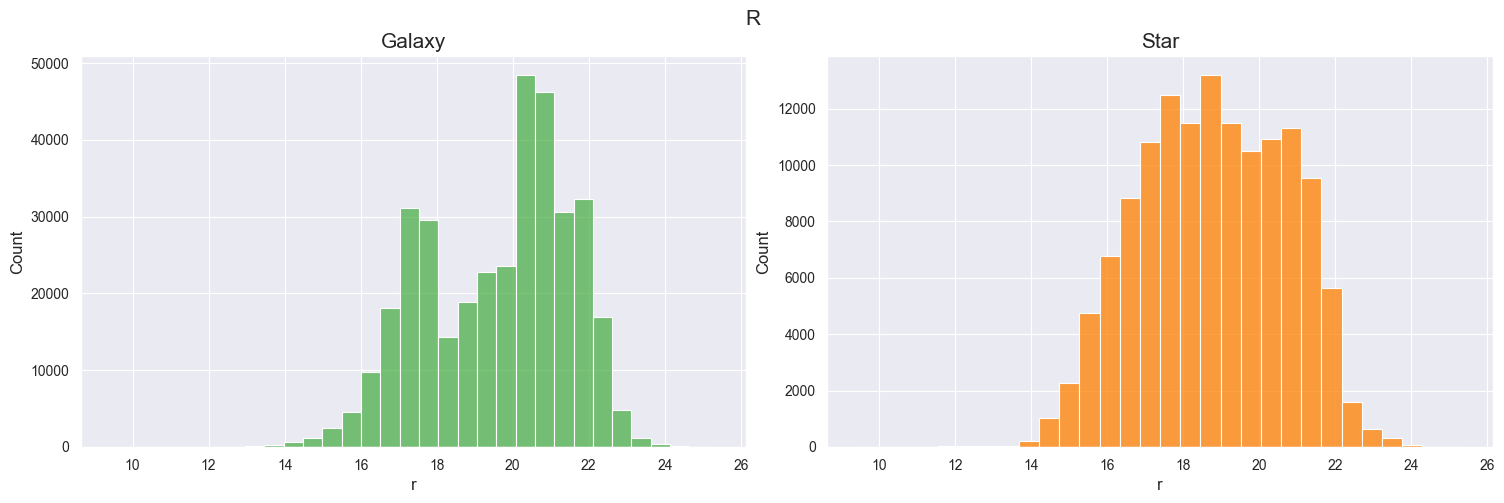

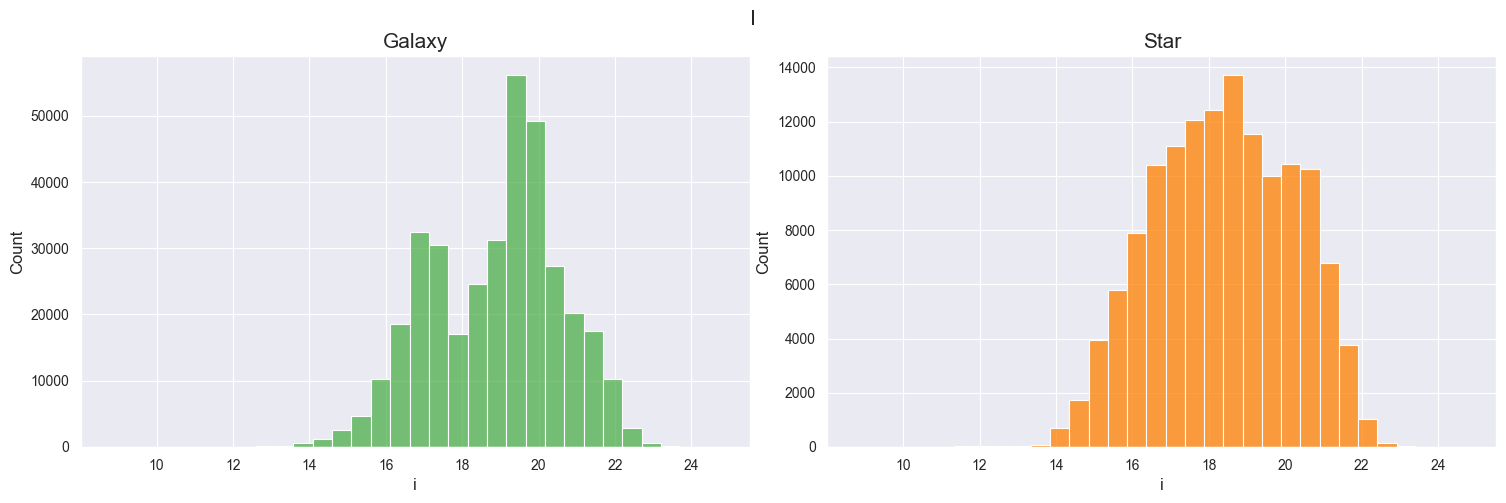

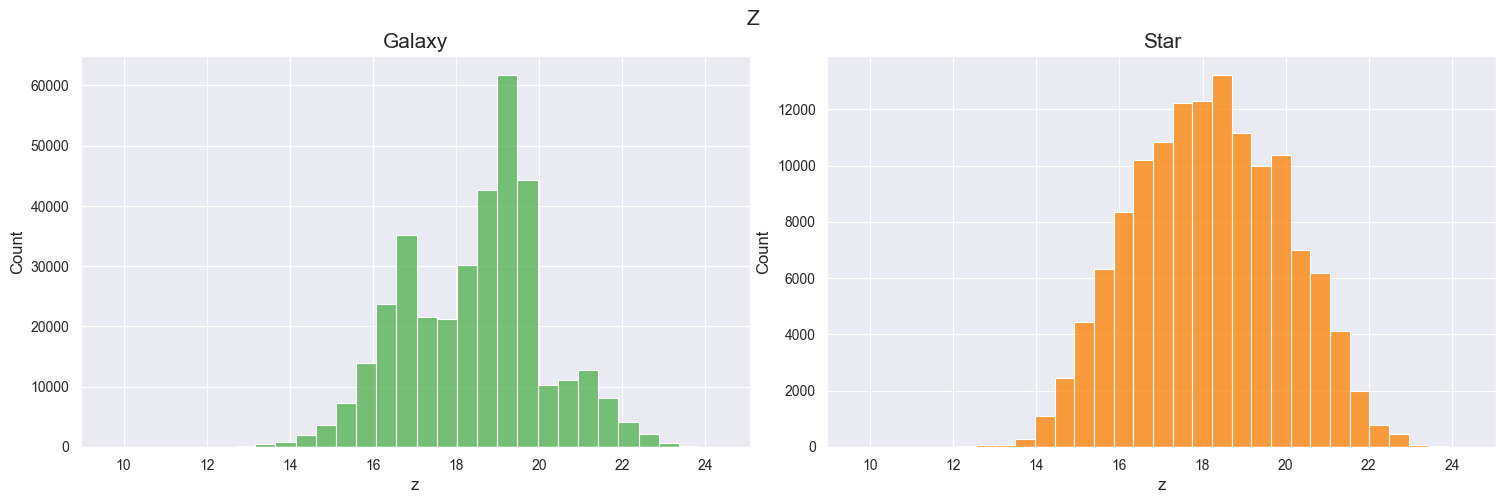

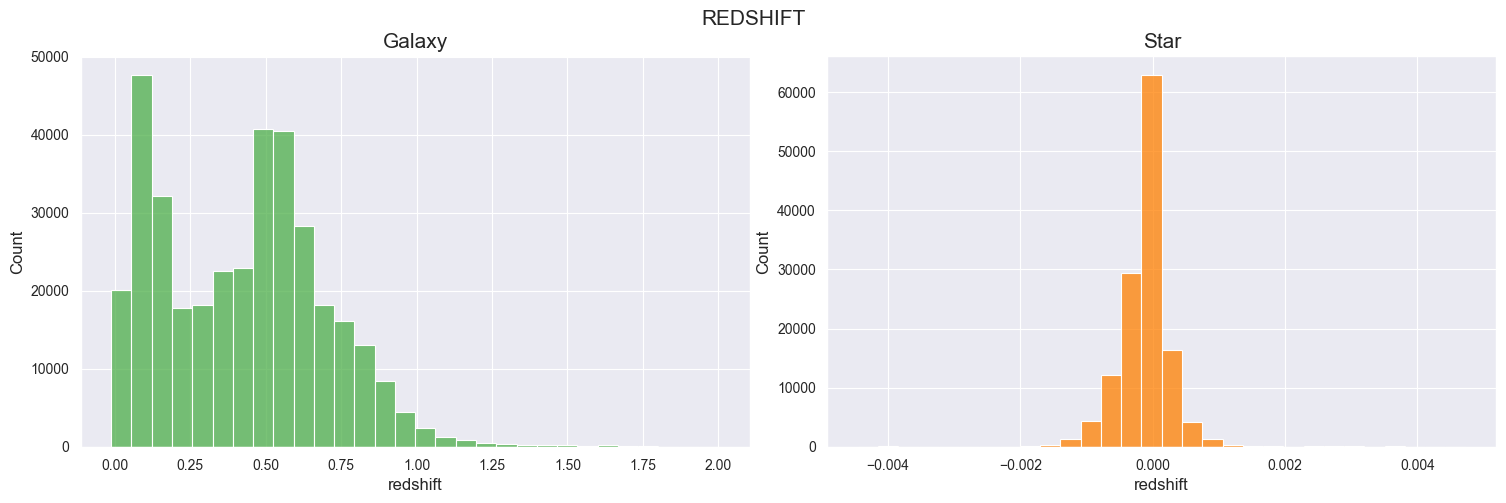

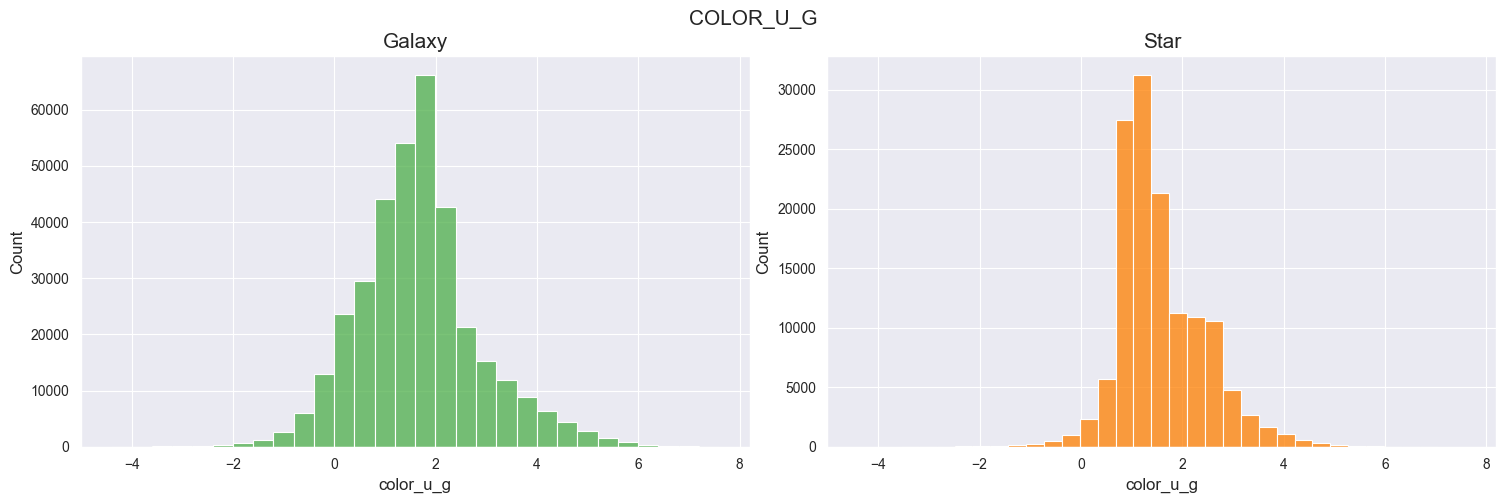

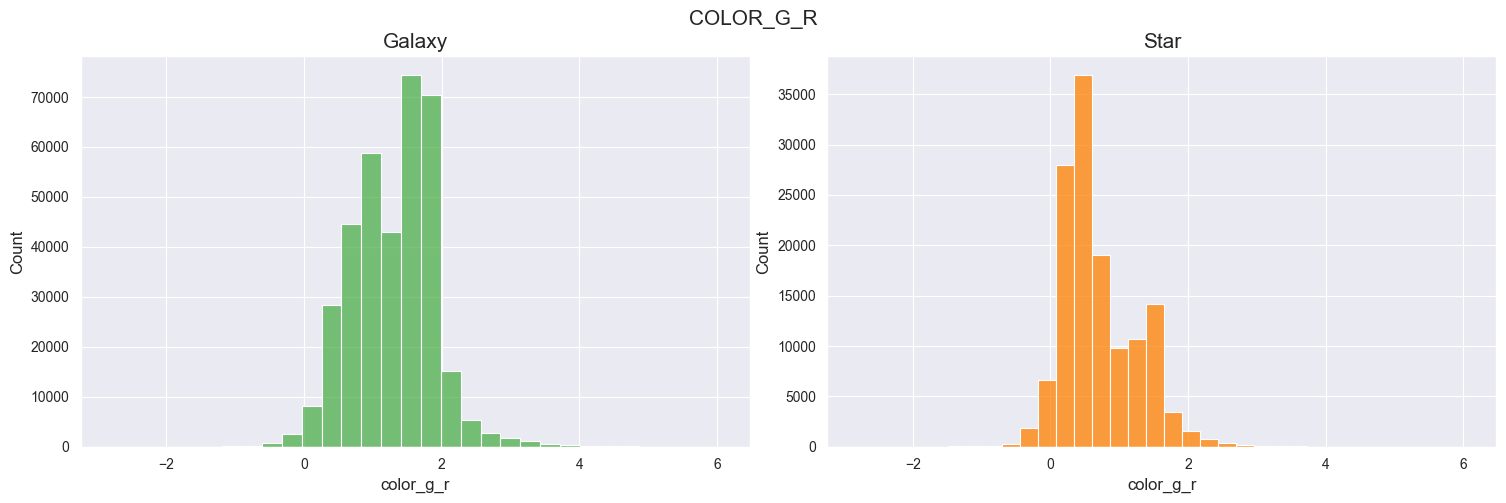

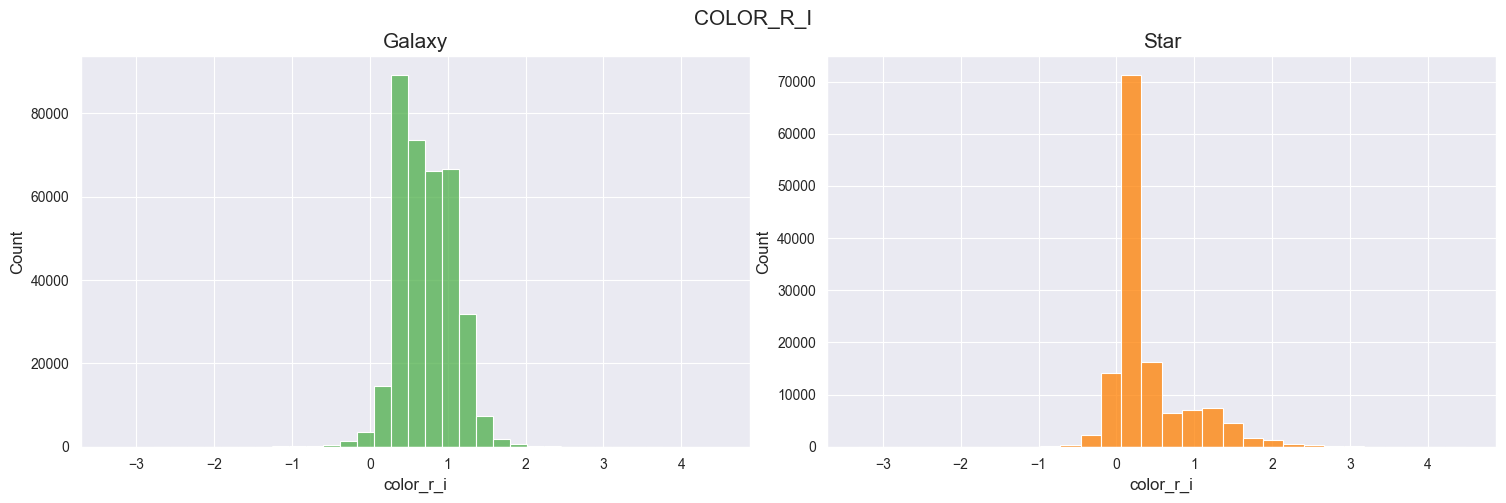

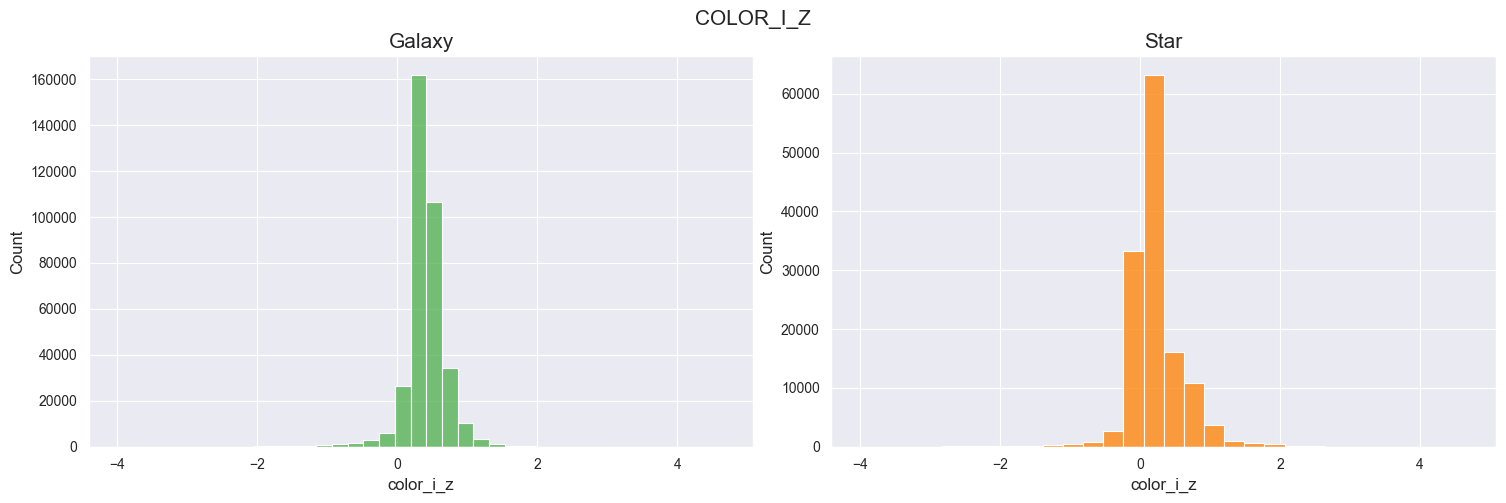

In [15]:
columns = list(data_model.drop(['class'], axis = 1).columns)
for name in columns:
    get_hists(name)

# Correlation matrix

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
fig.set_dpi(250)
ax = sns.heatmap(data_model[data_model['class']=='GALAXY'][
    ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[0], cmap='Spectral', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(data_model[data_model['class']=='STAR'][
    ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[1], cmap='Spectral', annot=True)
ax.set_title('Star')
fig.tight_layout(pad = 0.5);

### Pair Plot

In [ ]:
sns.pairplot(data_model.sample(10000), hue = 'class', height = 4, palette = palette);

# Logistic Regression Model

In [16]:
data_model.head()

,ra,dec,u,g,r,i,z,class,redshift,color_u_g,color_g_r,color_r_i,color_i_z
0,70.897791,-7.046481,20.26207,18.98241,18.40066,18.12477,18.04322,STAR,0.000824,1.27966,0.58175,0.27589,0.08155
1,70.982693,-6.875443,20.83626,19.27628,18.46186,18.11941,17.91683,STAR,0.000116,1.55998,0.81442,0.34245,0.20258
2,71.122745,-6.935282,20.31286,19.05241,18.86574,18.76263,18.74784,STAR,0.000454,1.26045,0.18667,0.10311,0.01479
3,71.046302,-6.894465,20.88652,19.97834,19.62850,19.37672,19.33097,STAR,0.000016,0.90818,0.34984,0.25178,0.04575
4,71.107683,-7.027117,20.08399,19.96288,20.30138,20.43546,20.52033,STAR,-0.000112,0.12111,-0.33850,-0.13408,-0.08487


In [8]:
X = data_model.drop(['class'], axis = 1)
y = data_model['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)

In [19]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [24]:
def plot_confusion(model_name, model, x_values, actual_values):
    labels = ['GALAXY', 'STAR']
    # Predict the values using the model
    predicted_values = model.predict(x_values)
    
    # Compute the confusion matrix
    confusion = confusion_matrix(actual_values, predicted_values, labels=labels)
    
    # Plot the confusion matrix
    plt.figure(dpi=150)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, fmt='g',
                square=True, xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.title(f'{model_name} Confusion Matrix', fontsize=12)
    plt.show()


In [21]:
linreg = LogisticRegression()

logreg_baseline = LogisticRegression(solver='lbfgs')

# Setup repeated stratified k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation
n_scores = cross_val_score(logreg_baseline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

logreg_baseline.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_accuracy = logreg_baseline.score(X_test_scaled, y_test)
print('Test Accuracy: %.3f' % test_accuracy)

Mean Accuracy: 0.991 (0.001)
Test Accuracy: 0.991


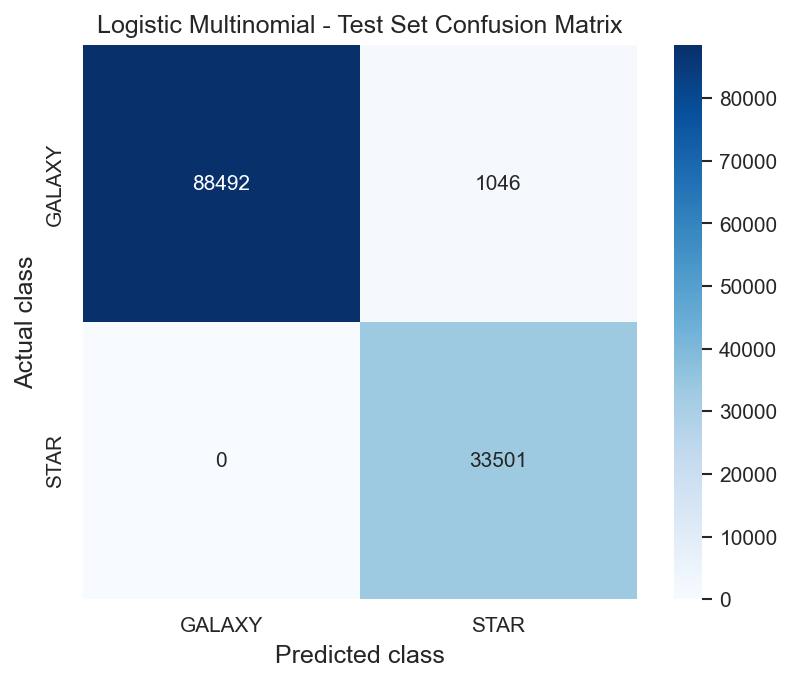

In [22]:
plot_confusion('Logistic Multinomial - Test Set',logreg_baseline, X_test_scaled, y_test)

In [23]:
y_pred = logreg_baseline.predict(X_test_scaled)
print('Logistic Regression accuracy:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Logistic Regression accuracy: 0.9914986305155276
              precision    recall  f1-score   support

      GALAXY    1.00000   0.98832   0.99412     89538
        STAR    0.96972   1.00000   0.98463     33501

    accuracy                        0.99150    123039
   macro avg    0.98486   0.99416   0.98938    123039
weighted avg    0.99176   0.99150   0.99154    123039


# Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print('Simple Decision Tree')
print('Simple Decision Tree accuracy:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Simple Decision Tree
Simple Decision Tree accuracy: 0.9974317086452263
              precision    recall  f1-score   support

      GALAXY    0.99792   0.99855   0.99824     89538
        STAR    0.99611   0.99445   0.99528     33501

    accuracy                        0.99743    123039
   macro avg    0.99702   0.99650   0.99676    123039
weighted avg    0.99743   0.99743   0.99743    123039


In [25]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [26]:
param_grid = {
    "max_depth" : [5,10,15],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [3,4,5,6],
    "max_features": ['auto', None],
}

grid = GridSearchCV(dtree, param_grid, cv=10, scoring='f1_weighted', verbose = 2)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_fe

C:\Users\aleksa.toroman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aleksa.toroman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aleksa.toroman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n

Best params:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 6}
Best estimator:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=6)
Best score:  0.9978878050442791


In [27]:
best_dtree = DecisionTreeClassifier(max_depth=15, 
                                    min_samples_leaf=5, 
                                    min_samples_split = 6, 
                                    max_features = None)

best_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=6)

In [28]:
print('Decision Tree - Test Set')
y_pred = best_dtree.predict(X_test)
print('Decision Tree accuracy best params:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Decision Tree - Test Set
Decision Tree accuracy best params: 0.9979599964238981
              precision    recall  f1-score   support

      GALAXY    0.99916   0.99803   0.99860     89538
        STAR    0.99476   0.99776   0.99626     33501

    accuracy                        0.99796    123039
   macro avg    0.99696   0.99790   0.99743    123039
weighted avg    0.99796   0.99796   0.99796    123039


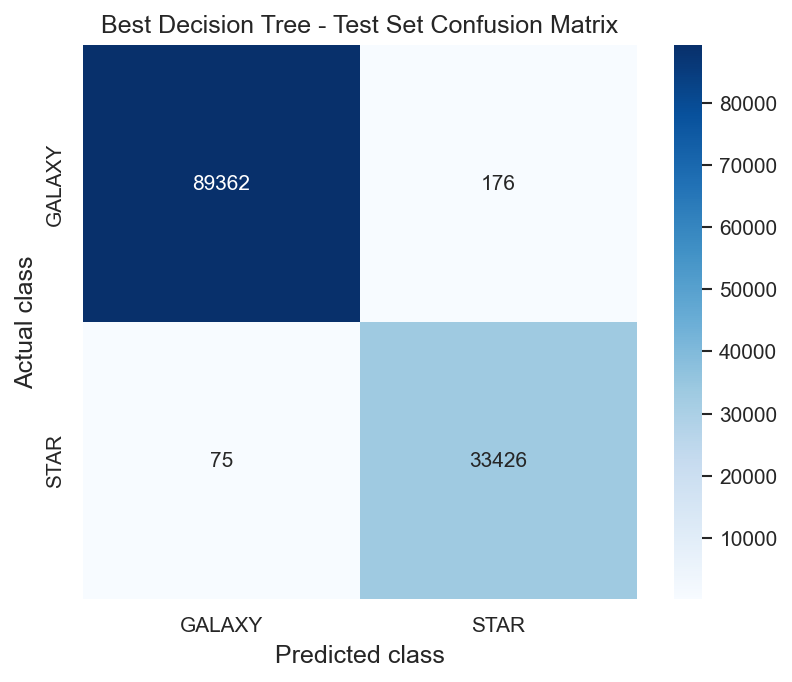

In [29]:
plot_confusion('Best Decision Tree - Test Set', best_dtree,  X_test, y_test)

# KNN

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the knn parameters to training data set
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print('KNN accuracy - test set:', metrics.accuracy_score(y_test, y_pred))

KNN accuracy - test set: 0.9829078584838954


In [31]:
param_grid = {
    "n_neighbors": np.arange(1,12),
    "weights": ['uniform', 'distance'],
    "metric": ["euclidean","manhattan"],
    "n_jobs": [4]}
    
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_weighted', verbose = 2)
grid.fit(X_train_scaled, y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.2s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   1.9s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.1s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.2s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.0s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.0s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.1s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.1s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.0s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weights=uniform; total time=   2.1s
[CV] END metric=euclidean, n_jobs=4, n_neighbors=1, weigh

In [39]:
best_knn = KNeighborsClassifier(n_neighbors=6, weights='uniform', metric='manhattan', n_jobs=4)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=6)

In [40]:
print('KNN - Test Set')
y_pred = best_knn.predict(X_test_scaled)
print('KNN accuracy with best params:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

KNN - Test Set
KNN accuracy with best params: 0.9839237965198027
              precision    recall  f1-score   support

      GALAXY    0.99522   0.98263   0.98888     89538
        STAR    0.95510   0.98737   0.97097     33501

    accuracy                        0.98392    123039
   macro avg    0.97516   0.98500   0.97993    123039
weighted avg    0.98429   0.98392   0.98401    123039


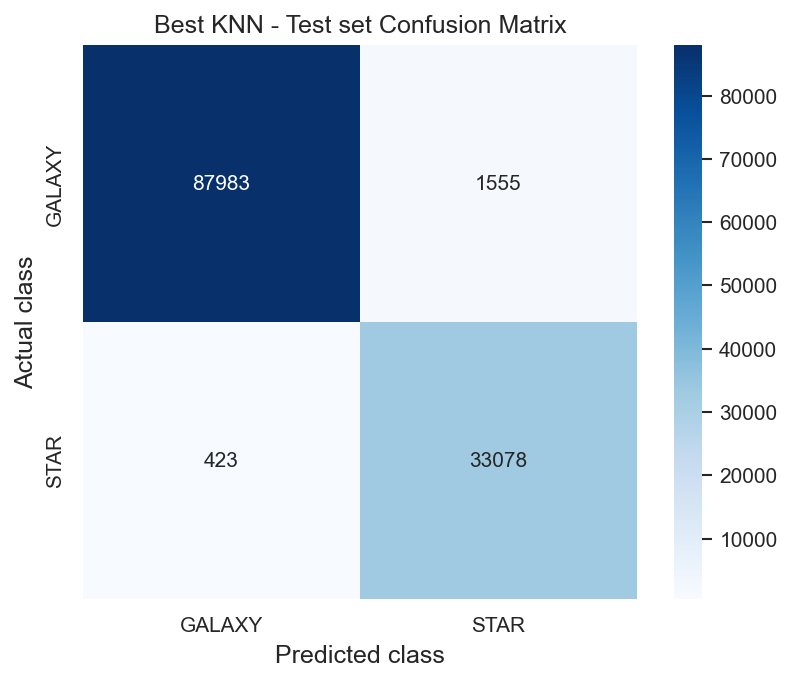

In [41]:
plot_confusion("Best KNN - Test set", best_knn, X_test_scaled, y_test)

### Grid search - k neighbors

In [35]:
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)    
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose = 2)
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
[CV] END ......................................n_neighbors=1; total time=   3.6s
[CV] END ......................................n_neighbors=1; total time=   3.5s
[CV] END ......................................n_neighbors=1; total time=   3.5s
[CV] END ......................................n_neighbors=1; total time=   3.5s
[CV] END ......................................n_neighbors=1; total time=   3.6s
[CV] END ......................................n_neighbors=1; total time=   3.6s
[CV] END ......................................n_neighbors=1; total time=   3.5s
[CV] END ......................................n_neighbors=1; total time=   3.5s
[CV] END ......................................n_neighbors=1; total time=   3.5s
[CV] END ......................................n_neighbors=1; total time=   3.6s
[CV] END ......................................n_neighbors=2; total time=   4.3s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=2)

In [36]:
results = pd.DataFrame(grid.cv_results_)

In [37]:
mean_test_scores = results['mean_test_score']
neighbors = results['param_n_neighbors']

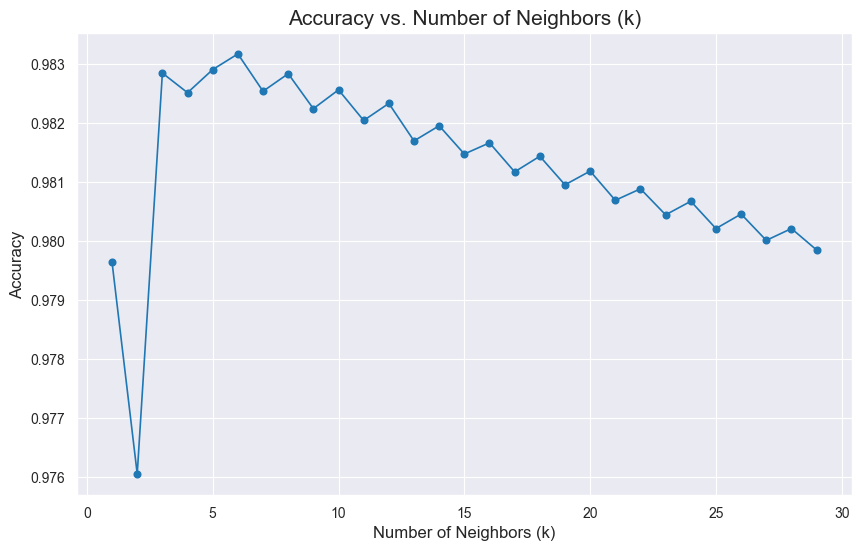

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, mean_test_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train,y_train)

y_pred = gauss_nb.predict(X_test)

print('Gaussian Naive Bayes')
print('Gaussian Naive Bayes accuracy:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 3))

Gaussian Naive Bayes
Gaussian Naive Bayes accuracy: 0.9798356618633116
              precision    recall  f1-score   support

      GALAXY      0.983     0.990     0.986     89538
        STAR      0.972     0.953     0.963     33501

    accuracy                          0.980    123039
   macro avg      0.977     0.972     0.974    123039
weighted avg      0.980     0.980     0.980    123039


In [43]:
gauss_nb = GaussianNB()
param_grid = {
             "var_smoothing": np.logspace(-15,1,base=10,num=50)
             }

grid = GridSearchCV(gauss_nb, param_grid, cv = 10, scoring = 'f1_weighted', verbose = 2)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ................................var_smoothing=1e-15; total time=   0.2s
[CV] END ...............var_smoothing=2.1209508879201924e-15; total time=   0.2s
[CV] END ...............var_smoothing=2.120950

In [44]:
best_gauss = GaussianNB(var_smoothing=8.685113737513521e-13)

best_gauss.fit(X_train, y_train)
y_pred = best_gauss.predict(X_test)

print('Gaussian NB - Test Set')
print('Gaussian NB accuracy best params:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Gaussian NB - Test Set
Gaussian NB accuracy best params: 0.9899869147180975
              precision    recall  f1-score   support

      GALAXY    0.99389   0.99234   0.99311     89538
        STAR    0.97961   0.98370   0.98165     33501

    accuracy                        0.98999    123039
   macro avg    0.98675   0.98802   0.98738    123039
weighted avg    0.99000   0.98999   0.98999    123039


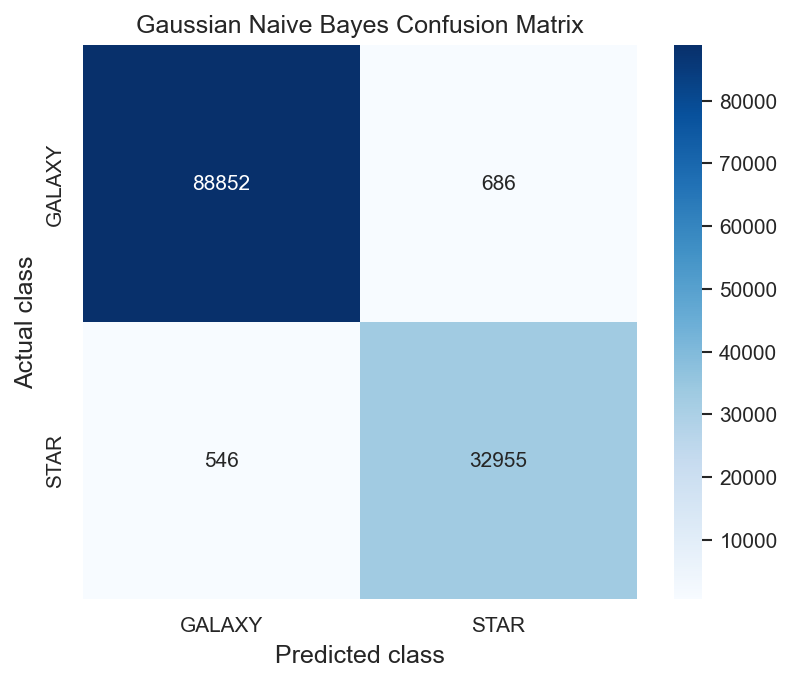

In [45]:
plot_confusion("Gaussian Naive Bayes", best_gauss, X_test, y_test)

### Random forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('Random Forest')
print('Random Forest accuracy:', metrics.accuracy_score(y_test, y_pred))


Random Forest
Random Forest accuracy: 0.9985289217240062


In [12]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [16]:
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {'max_features':[None, 'auto', 'sqrt', 'log2'],
                   'max_depth':[None, 1, 5, 10, 15, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                   'criterion': ['gini', 'entropy']}
rf_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions=hyperparameters, scoring='accuracy', n_iter = 100, cv = 10, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  11.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time= 2.5min
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; t

/home/milica/Desktop/stars-or-galaxies-classification/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
122 fits failed with the following error:
Traceback (most recent call last):
  File "/home/milica/Desktop/stars-or-galaxies-classification/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/milica/Desktop/stars-or-galaxies-classification/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/milica/Desktop/stars-or-galaxi

[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 7.4min
[CV] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  17.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=  29.8s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=  34.1s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time= 2.0min
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time= 1.4min
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 7.5min
[CV] END criterion=entropy, max_depth=No

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 5, 10, 15, 20],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=123, scoring='accuracy', verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 15,
 'criterion': 'entropy'}

In [21]:
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

In [22]:
print('Random Forest - Test Set')
print('Random Forest accuracy with best params:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Random Forest - Test Set
Random Forest accuracy with best params: 0.9987646193483367
              precision    recall  f1-score   support

      GALAXY    0.99974   0.99856   0.99915     89538
        STAR    0.99616   0.99931   0.99773     33501

    accuracy                        0.99876    123039
   macro avg    0.99795   0.99894   0.99844    123039
weighted avg    0.99877   0.99876   0.99877    123039


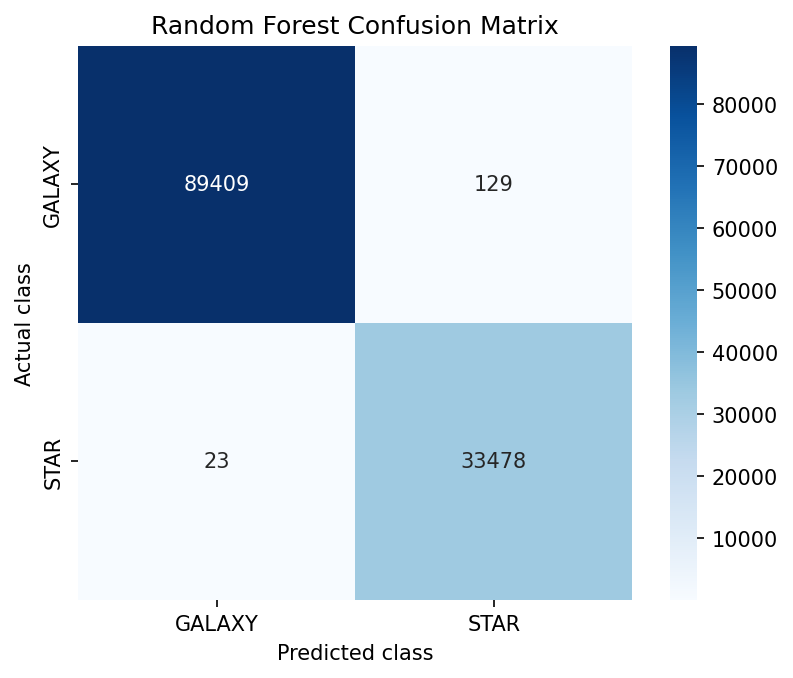

In [25]:
plot_confusion("Random Forest", best_rf, X_test, y_test)

### Feature importance

In [26]:
importances_rf = pd.DataFrame({'feature': X_train.columns,
                             'importance': best_rf.feature_importances_})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(17)

,importance
feature,
redshift,0.984701
color_u_g,0.002335
z,0.001965
g,0.001499
color_i_z,0.001452
color_g_r,0.001378
color_r_i,0.001370
ra,0.001270
dec,0.001212
